# UAS DATA MINING

### Eksplorasi Data Titanic Menggunakan Algoritma KMeans

#### Kelompok 11

Gilang Rizki Pratama - 11150940000033

Suci Martina - 11150940000010

Ahmad Ruslan Almujaddidi - 11160910000052

**Tujuan Eksplorasi**

Tujuan dari eksplorasi data kali ini adalah menjawab setidaknya 2 pertanyaan: 

1. *Apa yang menyebabkan banyaknya korban pada tragedi titanic?*
2. *Bagaimana menghandle missing values pada data?*

Langkah-langkah pengerjaan yang tersusun dalam prosedur akan berpusat pada keinginan untuk menjawab kedua pertanyaan tersebut.

**Prosedur Pengerjaan**

1. Import library, loading data dan eksplorasi data (terdapat missing value pada data)
2. Persiapan fitur
3. Imputasi missing value
4. Penerapan Elbow dan KMeans
5. Visualisasi dan analisa
6. Kesimpulan

### 1. Import, Loading, Eksplorasi

Import library yang dibutuhkan untuk pengolahan data. Library yang diimport pada kali ini belumlah semua, dan di akhir akan ada beberapa library tambahan yang diimport

Beberapa library yang digunakan beserta fungsinya, antara lain
1. Pandas, pengolahan data tabular
2. Numpy, operasi array data
3. Scipy, menentukan derajat independen variabel
4. Matplotlib - Pylab - Seaborn, visualisasi data 
5. InteractiveShell, mempermudah melihat output pandas

In [1]:
import pandas as pd
import numpy as np

import scipy
from scipy.stats import spearmanr

import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Untuk memudahkan setiap step visualisasi yang akan dilakukan, maka figur kanvas ditentukan dari awal ukuran dan stylenya

In [2]:
rcParams["figure.figsize"] = 5, 4
sb.set_style("whitegrid")

Loading data titanic ke pandas

In [3]:
df = pd.read_excel("TITANIC DATASET.xlsx")

Melihat informasi terkait data titanic. Dapat dilihat bahwa terdapat 14 fitur (kolom) dengan 1309 sampel. Di dalamnya juga terdapat nilai null yang bisa dilihat dari tidak sempurnanya jumlah dari setiap fitur

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


Melihat statistik deskriptif dari data

In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Melihat nilai dari data dengan menggunakan pandas.head. Sekilas dapat dilihat terdapat nilai null dalam bentuk NaN di beberapa data awal

In [6]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Selanjutnya dilakukan pengecekan terhadap sampel duplikat yang mungkin terdapat di dalam data. Data duplikat tidak terlihat dari info dataframe dan statistik deskriptif

In [7]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

Untuk memudahkan melihat jumlah sampel dan fitur (baris dan kolom), dapat digunakan shape (mengetahui bentuk dari data)

In [8]:
# Get rows x columns
df.shape

(1309, 14)

Sebelum melakukan eksplorasi ini, kami telah melakukan perencanaan yang akan dilakukan kepada fitur-fitur yang terdapat di dalam data. Perencanaan yang kami susun bertujuan untuk menjawab pertanyaan akhir yang menjadi tujuan eksplorasi. Karena itu, beberapa fitur yang menurut kami tidak menyumbangkan nilai kepada tujuan tersebut akan dibuang. 

Misalnya fitur-fitur yang akan dibuang adalah 
1. Embarked := dari pelabuhan mana penumpang naik ke Titanic
2. Home.Dest := rumah dari penumpang, sekaligus tempat tujuannya
3. Body := kurang jelas fungsinya. Namun sepertinya adalah nomor identifikasi untuk mayat korban Titanic

Ketiga fitur di atas tidak menyumbangkan nilai pada tujuan akhir, karena itu fitur tersebut akan dibuang sejak awal

In [9]:
# Drop unneeded columns
df.drop(columns=["embarked", "home.dest", "body"], inplace=True)

Pengecekan jumlah null values pada data. Dapat dilihat null values terdapat pada 4 fitur. 

Untuk setiap fitur ini, kami akan berikan metode penanganan yang berbeda, di antaranya,
1. **Age := umur dari penumpang.** Fitur ini akan dijadikan data kategorik dengan nilai anak-anak dan dewasa (Child & Adult) dan akan diisi dengan menggunakan pencarian umur melalui nama penumpang, juga dengan pattern saudara kandung, pasangan, orangtua dan anak.
2. **Cabin := kabin tempat penumpang bersinggah di Titanic.** Fitur ini akan kami imputasi dengan regresi logistik.
3. **Boat := nomor sekoci bagi penumpang yang selamat.** Fitur ini akan dihapus nanti setelah mendapatkan asumsi yang tepat darinya. Karena nomor sekoci penumpang secara intuitif tidak bisa memberikan nilai pada kesimpulan akhir
4. **Fare := tarif yang dibayarkan penumpang**. Fitur ini akan dihapus listwise, karena hanya terdapat 1 nilai null

In [10]:
# Sum up all NaN in dataset
df.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
boat         823
dtype: int64

#### Menghapus sampel null dari fare

Di bawah ini akan dilakukan penghapusan listwise dari data fare dengan sebelumnya dicari dimana letak index dari data yang null

Sorting dilakukan terhadap fare, biasanya data bernilai NaN akan muncul di salah satu ujung hasil sorting. Dan pada kasus ini, data NaN muncul di belakang dengan index 1225.

**Perlu diperhatikan bahwa pada proses sorting tidak dilakukan metode *inplace*, yaitu pengubahan dataframe pandas di tempat sambil melakukan sorting.**

In [11]:
# Sort values according to columns "Fare"
df.sort_values(["fare"])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,NaN
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,C
1254,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,15
896,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,NaN
898,3,0,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,NaN
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,NaN
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,NaN
581,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,NaN


Melihat lokasi dari index 1225

In [12]:
df.iloc[1225]

pclass                       3
survived                     0
name        Storey, Mr. Thomas
sex                       male
age                       60.5
sibsp                        0
parch                        0
ticket                    3701
fare                       NaN
cabin                      NaN
boat                       NaN
Name: 1225, dtype: object

Membuang secara listwise data berindex 1225

In [13]:
# Remove index 1225
df.drop([1225], inplace=True)

Melakukan reset terhadap index

In [14]:
# For reseting index
df.reset_index(drop=True, inplace=True)

Mengecek shape untuk memastikan bentuk data setelah dilakukan 1x penghapusan listwise dan 3x penghapusan columnwise

In [15]:
# Check current shape
df.shape

(1308, 11)

Untuk mendapatkan gambaran dari data lebih lanjut, dapat digunakan fungsi hist. Beberapa informasi bisa didapatkan dari histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021853CA52E8>,
      dtype=object)

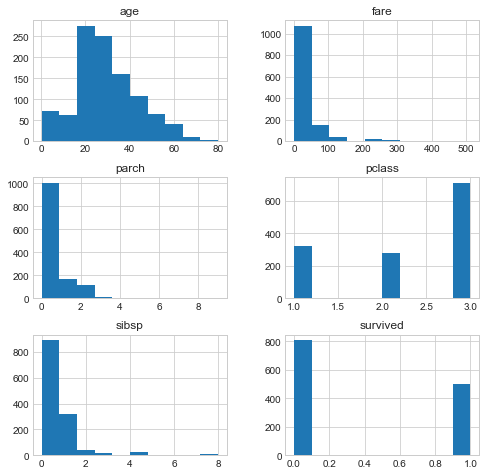

In [17]:
df.hist(figsize=(8,8))

### 2. Persiapan Fitur

Proses persiapan fitur tidak hanya dilakukan pada bagian ini, namun akan terus dilakukan ketika fitur dibutuhkan untuk diambil dan diubah

#### -- Survival -- 

Di bawah ini akan dilakukan pengambilan terhadap fitur survival dan menjawab asumsi kebutuhan penghapusan fitur boat (salah satu fitur yang memiliki missing value)

Membuat list dan pencarian nilai dari fitur survived untuk mendapatkan jumlah persis berapa korban jiwa dan jumlah orang yang selamat

In [18]:
do_survive = []
not_survive = []

In [19]:
survived_values = df.loc[:, ["survived"]] == 1
survived_values = dict(survived_values)

In [20]:
survived_values['survived'][0]

True

In [21]:
for i in range(len(df)):
    if survived_values["survived"][i] == True:
        do_survive.append(survived_values["survived"][i])
    else:
        not_survive.append(survived_values["survived"][i])

Bisa dilihat jumlah persis dari korban jiwa dan orang yang selamat adalah 500 dibanding 808

In [22]:
len(do_survive)
len(not_survive)

500

808

Di bawah ini dapat dilihat bahwa jumlah orang yang selamat lebih banyak daripada jumlah data boat yang ada. Dan orang-orang yang menjadi korban tidak mendapatkan nilai pada fitur boat. Karena fitur boat tidak menjelaskan apapun terhadap keadaan orang yang selamat, maupun yang menjadi korban (selain mereka mendapatkan perahu). Karena itu fitur boat akan dibuang.

In [23]:
# There are more survived people than the boat
# It means the boat is irrelevant because it didn't contribute to people survive

df["survived"].sum()
df["boat"].count()

500

486

In [24]:
df.drop(columns=["boat"], inplace=True)

In [25]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26


#### -- Cabin --

Di bawah ini akan dicari pola untuk mendapatkan lokasi kabin yang menurut kami menjadi petunjuk yang bagus terhadap keberadaan penumpang di kapal ketika terjadi tragedi Titanic

Hanya ada 295 kabin di data, dan 1013 lainnya hilang

In [26]:
# Data Cabin non-missing count
df["cabin"].count()

295

In [27]:
df.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           0
cabin       1013
dtype: int64

Di bawah ini akan dilakukan operasi untuk mendapatkan kode terdepan dari nama Kabin yang mungkin merupakan penunjuk blok dari kabin kapal

In [28]:
# Cabin_name := values of Cabin features
# Cabin_cat := category of Cabin features

cabin_name = []
cabin_cat = []

In [29]:
# Get all cabin name from data
cabin_name = [ str(cabin) for cabin in df["cabin"] ]

In [30]:
for cat in cabin_name:
    if cat in cabin_cat:
        pass
    else:
        cabin_cat.append(cat)

In [31]:
len(cabin_name)

1308

In [32]:
cabin_cat[:10]

['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', 'nan', 'C62 C64', 'B35', 'A23']

In [33]:
cabin_cat.pop(6)

'nan'

In [34]:
len(cabin_cat)

186

In [35]:
real_cabin_cat = []
for cat in cabin_cat:
    w = cat[0]
    if w in real_cabin_cat:
        pass
    else:
        real_cabin_cat.append(w) 

Pada tahap ini telah didapatkan 8 blok Kabin yang nantinya akan digunakan dalam proses imputasi. Untuk mendapatkan pola-pola yang merujuk pada keberadaan Kabin, akan digunakan fitur tambahan yang berhubungan dengan Kabin

In [36]:
real_cabin_cat.sort()
real_cabin_cat

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [37]:
cabin_cat_df = []
for item in cabin_name:
    if item[0] in real_cabin_cat:
        cabin_cat_df.append(item[0])
    else:
        cabin_cat_df.append("nan")

In [38]:
len(cabin_cat_df)

1308

In [39]:
df.drop(columns=["cabin"], inplace=True)

In [40]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500


In [41]:
df = df.assign(cabin=cabin_cat_df)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C


#### Partisi Data untuk Imputasi

Berikut akan dilakukan proses partisi data untuk mempersiapkan data yang akan diimputasi

Fitur yang akan diambil untuk menentukan (menjadi prediktor) dari lokasi Kabin adalah fitur pclass (passenger class) dan fare (tarif)

1. pclass := kelas penumpang. Menjadi penunjuk perbedaan status sosial di antara penumpang Titanic. Fitur ini dipilih karena bisa menjadi acuan blok-blok khusus bagi tiap kelas 
2. fare := tarif penumpang. Fitur ini dipilih karena ruang Kabin bisa didapatkan dari tarif yang berbeda. Alur pemikiran yang digunakan sama dengan penggunaan pclass

Pada proses ini juga akan dibentuk data training dan data testing untuk prediksi lokasi Kabin

In [42]:
test_list = [ [], [], [] ]
train_list = [ [], [], [] ]

for i in range(len(df)):
    if df.iloc[i].cabin == "nan":
        test_list[0].append(df.iloc[i].pclass)
        test_list[1].append(df.iloc[i].fare)
        test_list[2].append(df.iloc[i].cabin)
    else:
        train_list[0].append(df.iloc[i].pclass)
        train_list[1].append(df.iloc[i].fare)
        train_list[2].append(df.iloc[i].cabin)

In [43]:
train_list[0][0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Membuat sebuah DataFrame df_train dan df_test dari list pclass, fare dan cabin

In [44]:
df_train = pd.DataFrame({"train_pclass":train_list[0], "train_fare":train_list[1], "train_cabin":train_list[2]})
df_test = pd.DataFrame({"test_pclass":test_list[0], "test_fare":test_list[1], "test_cabin":test_list[2]})

Perbedaan jumlah data training dan testing

In [ ]:
len(df_train)
len(df_test)

In [46]:
# Train data 0 to 294
df_train.head()
df_train.tail()

,train_cabin,train_fare,train_pclass
0,B,211.3375,1
1,C,151.5500,1
2,C,151.5500,1
3,C,151.5500,1
4,C,151.5500,1


,train_cabin,train_fare,train_pclass
290,G,16.7000,3
291,F,7.6500,3
292,G,10.4625,3
293,G,10.4625,3
294,F,7.7500,3


In [47]:
# Test data 0 to 1012
df_test.head()
df_test.tail()

,test_cabin,test_fare,test_pclass
0,nan,49.5042,1
1,nan,78.8500,1
2,nan,25.9250,1
3,nan,227.5250,1
4,nan,26.0000,1


,test_cabin,test_fare,test_pclass
1008,nan,14.4542,3
1009,nan,14.4542,3
1010,nan,7.2250,3
1011,nan,7.2250,3
1012,nan,7.8750,3


#### Label Encoding

Encoding adalah sebuah proses membuat data kategorik menjadi data numerik (continuous atau multiclass). Encoding dapat dilakukan dengan menggunakan kelas LabelEncoder() dari scikit-learn. Namun, pada kali ini encoding akan dilakukan manual.

Dapat dilihat bahwa data train memiliki semua blok Kabin untuk menjadi prediktor

In [48]:
df_train["train_cabin"].unique()

array(['B', 'C', 'E', 'D', 'A', 'T', 'F', 'G'], dtype=object)

Encoding manual

In [49]:
# If using ordered ordinal
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "A", 1, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "B", 2, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "C", 3, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "D", 4, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "E", 5, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "F", 6, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "G", 7, df_train["train_cabin"])
df_train["train_cabin"] = np.where(df_train["train_cabin"] == "T", 8, df_train["train_cabin"])
df_test["test_cabin"] = np.where(df_test["test_cabin"] == "nan", 0, df_test["test_cabin"])

Melihat relasi dari data training. Dalam metode regplot juga terdapat fitur untuk menunjukkan kurva logistik. Namun terdapat error ketika digunakan saat ini, karena itu digunakan kurva linier

Ketiga fitur di bawah memberikan informasi antara lain,

1. pclass1 memiliki tarif lebih mahal dibanding pclass 2 dan 3
2. Blok di pclass1 lebih banyak dibanding pclass 2 dan 3
3. Pada blok 4 menuju ke 1, harga dari tarif yang harus dikeluarkan penumpang terus bertambah

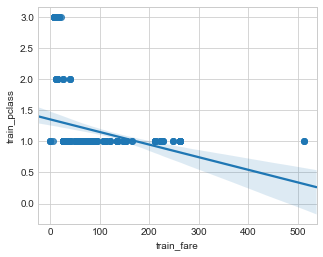

In [50]:
sb.regplot(x = "train_fare", y = "train_pclass", data = df_train, scatter = True)

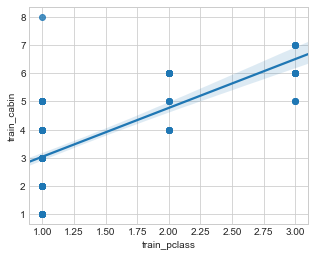

In [51]:
sb.regplot(x = "train_pclass", y = "train_cabin", data = df_train.astype(float), scatter = True)

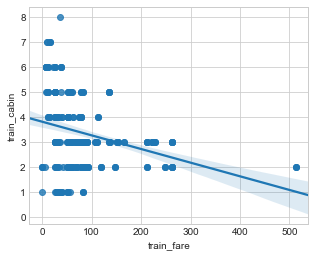

In [52]:
sb.regplot(x = "train_fare", y = "train_cabin", data = df_train, scatter = True)

Berikut akan diukur koefisien korelasi udari fitur pclass dan fare. Karena regresi logistik mengasumsikan bahwa dua variabel harus independen satu sama lain. Dan didapatkan hasil -0.53 yang berarti kedua variabel independen satu sama lainnya

In [53]:
# Calculate correlaction between pclass and fare
# No Correlation at all
vpclass = df_train["train_pclass"]
vfare = df_train["train_fare"]
spearmanr_coefficient, p_value = spearmanr(vpclass, vfare)
print(f"Spearman Rank Correlation Coefficient {spearmanr_coefficient}")

Spearman Rank Correlation Coefficient -0.5356702938880166


Berikut dapat dilihat distribusi penumpang di training data terhadap blok Kabin

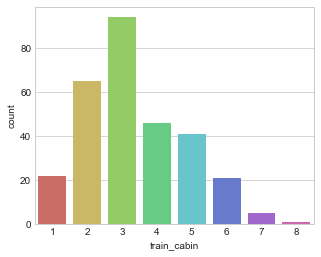

In [54]:
sb.countplot(x = "train_cabin", data = df_train, palette = 'hls')

### 3. Imputasi Missing Value dengan Regresi Logistik

Berikut akan dilakukan prediksi terhadap missing value dengan menggunakan regresi logistik. 

Pada tahap ini, proses akan **sangat** repetitif karena dilakukan manual. Oleh, karena itu penjelasan akan dilakukan pada bagian-bagian yang diperlukan

Import library yang dibutuhkan untuk membantu imputasi

In [55]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn import utils

Membuat sebuah instansi dari LabelEncoder yang dapat digunakan untuk mengubah data menjadi continous atau multiclass

In [56]:
# Make instance of Label Encoder
lab_enc = preprocessing.LabelEncoder()

In [57]:
# Get values of target vector
test = df_train.iloc[:, 0].values

In [58]:
# Encode target vector into multiclass
test_encoded = lab_enc.fit_transform(test)
print(utils.multiclass.type_of_target(test))
print(utils.multiclass.type_of_target(test_encoded))

unknown
multiclass


Membuat instansi dari kelas Regresi Logistik

In [59]:
# Make instance of Logistic Regression
clf_logreg= LogisticRegression()

#### Data untuk diproses

Membuat data backup agar ketika terjadi kesalahan, proses dapat diulang tanpa mengulang dari awal

In [60]:
# Backup data 
original_df_train = df_train.copy()
original_df_test = df_test.copy()
df_results = df_train.copy()

In [61]:
df_train.head()

,train_cabin,train_fare,train_pclass
0,2,211.3375,1
1,3,151.5500,1
2,3,151.5500,1
3,3,151.5500,1
4,3,151.5500,1


#### Sampling acak untuk mendapatkan data testing yang beragam

In [62]:
# Mix data to be random
import random
random_sampling = random.sample(range(len(df_test)), len(df_test))
len(random_sampling)

1013

In [63]:
df_test["random index"] = random_sampling

In [64]:
df_test.sort_values("random index", inplace=True)

In [65]:
df_test.set_index("random index", inplace=True)

Index hasil dari sampling acak digunakan untuk mempartisi data testing

In [66]:
df_test.shape
df_test.head()

(1013, 3)

,test_cabin,test_fare,test_pclass
random index,,,
0,0,7.2250,3
1,0,0.0000,3
2,0,9.5000,3
3,0,25.4667,3
4,0,6.9500,3


### Imputasi Pertama

Target vektor digunakan untuk menjadi representasi nilai nan. Target vektor akan berupa nilai dari 1 - 8 dan diambil secara random

In [67]:
target_vector = np.random.randint(1, high=9, size=len(df_train))

Encoding dilakukan terhadap target vektor

In [68]:
test_encoded = lab_enc.fit_transform(target_vector)
print(utils.multiclass.type_of_target(target_vector))

multiclass


Membuat dataframe partisi untuk testing dari jumlah total data yang missing. Data partisi dibuat dengan jumlah yang sama dengan data training. Fungsi dari data partisi adalah menjadi representasi dari target vektor untuk nantinya diprekdsi nilai sebenarnya dari target vektor tersebut

In [69]:
partitioned_df = df_test.iloc[:len(df_train), :] # 0 : 295

In [70]:
partitioned_df = partitioned_df.assign(test_cabin = target_vector)

In [71]:
len(partitioned_df)
partitioned_df.head()

295

,test_cabin,test_fare,test_pclass
random index,,,
0,3,7.2250,3
1,4,0.0000,3
2,3,9.5000,3
3,7,25.4667,3
4,1,6.9500,3


Di bawah ini akan didapatkan rata-rata dari klasifier regresi logistik. Looping akan dilakukan 10x dan akurasi akan dilihat

In [72]:
mean_of_model = []

for i in range(10):
    target_vector = np.random.randint(1, high=9, size=len(partitioned_df))
    clf_logreg.fit(df_train, target_vector)
    clf_logreg.score(df_train, target_vector)
    mean_of_model.append(clf_logreg.score(df_train, target_vector))

mean_of_model = sum(mean_of_model)/float(len(mean_of_model))
print("Your accuracy score is {}".format(mean_of_model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.21694915254237288

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.2135593220338983

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.2135593220338983

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.18983050847457628

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.16610169491525423

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.15932203389830507

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.17966101694915254

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.15593220338983052

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.14915254237288136

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.2033898305084746

Your accuracy score is 0.1847457627118644


Akurasi yang didapatkan dari klasifier regresi logistik sangat kecil karena kemungkinan besar variasi dari data 1 - 8 menyebabkan sulitnya prediksi dilakukan, ditambah prediksi dilakukan kepada target vektor random. Juga jumlah data training dan testing yang sama, membuat akurasi menjadi menurun

Meski begitu, prediksi tetap bisa dilakukan dan nilai dari target vektor (Kabin) yang diinginkan masih bisa didapatkan

In [73]:
y_pred = clf_logreg.predict(partitioned_df)

Berikut nilai prediksi dimasukkan ke dalam variabel hasil testing blok Kabin

In [74]:
partitioned_df = partitioned_df.assign(test_cabin = y_pred)

Backup dari data proses imputasi pertama disimpan untuk nanti digunakan pada proses derandomisasi

In [75]:
# Proc1 backup
df_proc1 = partitioned_df.copy()

In [76]:
partitioned_df.head()

,test_cabin,test_fare,test_pclass
random index,,,
0,1,7.2250,3
1,1,0.0000,3
2,1,9.5000,3
3,7,25.4667,3
4,1,6.9500,3


In [77]:
df_train.head()

,train_cabin,train_fare,train_pclass
0,2,211.3375,1
1,3,151.5500,1
2,3,151.5500,1
3,3,151.5500,1
4,3,151.5500,1


Berikut ini adalah proses menambahkan data partisi yang baru saja diprediksi ke dalam data training untuk menjadi bagian dari data training

In [78]:
partitioned_df.columns = ["train_cabin", "train_fare", "train_pclass"]

In [79]:
len(df_train)

295

In [80]:
df_train = df_train.append(partitioned_df, ignore_index=True)

In [81]:
df_train.tail()

,train_cabin,train_fare,train_pclass
585,7,29.0000,2
586,7,19.9667,3
587,7,39.6000,1
588,1,23.4500,3
589,1,7.8958,3


In [82]:
next_par = 295 + len(df_train) 
next_par

885

### Imputasi Kedua

Proses imputasi yang meliputi 3 step ini terhitung repetitif dan sama. Karena itu penjelasan untuk imputasi kedua tidak diadakan dan bisa dilanjutkan ke imputasi ketiga

In [83]:
target_vector = np.random.randint(1, high=9, size=len(df_train))

In [84]:
test_encoded = lab_enc.fit_transform(target_vector)
print(utils.multiclass.type_of_target(target_vector))

multiclass


In [85]:
partitioned_df = df_test.iloc[next_par-len(df_train):next_par, :] # 295 : 885

In [86]:
partitioned_df = partitioned_df.assign(test_cabin = target_vector)

In [87]:
len(partitioned_df)
partitioned_df.tail()

590

,test_cabin,test_fare,test_pclass
random index,,,
880,2,26.000,2
881,4,10.500,2
882,1,7.925,3
883,3,15.500,3
884,7,18.000,3


In [88]:
mean_of_model = []

for i in range(10):
    target_vector = np.random.randint(1, high=9, size=len(partitioned_df))
    clf_logreg.fit(df_train, target_vector)
    clf_logreg.score(df_train, target_vector)
    mean_of_model.append(clf_logreg.score(df_train, target_vector))

mean_of_model = sum(mean_of_model)/float(len(mean_of_model))
print("Your accuracy score is {}".format(mean_of_model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.17796610169491525

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.16779661016949152

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.15254237288135594

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.17288135593220338

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.17796610169491525

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.18135593220338983

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.15254237288135594

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.17966101694915254

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.1711864406779661

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.16101694915254236

Your accuracy score is 0.16949152542372883


In [89]:
y_pred = clf_logreg.predict(partitioned_df)

In [90]:
partitioned_df = partitioned_df.assign(test_cabin = y_pred)

In [91]:
# Proc2 backup
df_proc2 = partitioned_df.copy()

In [92]:
partitioned_df.head()

,test_cabin,test_fare,test_pclass
random index,,,
295,3,8.0500,3
296,3,0.0000,2
297,3,7.7750,3
298,3,8.1583,3
299,3,7.7500,3


In [93]:
df_train.head()

,train_cabin,train_fare,train_pclass
0,2,211.3375,1
1,3,151.5500,1
2,3,151.5500,1
3,3,151.5500,1
4,3,151.5500,1


In [94]:
partitioned_df.columns = ["train_cabin", "train_fare", "train_pclass"]

In [95]:
len(df_train)
len(partitioned_df)

590

590

In [96]:
df_train = df_train.append(partitioned_df, ignore_index=True)

In [97]:
df_train.tail()

,train_cabin,train_fare,train_pclass
1175,3,26.000,2
1176,6,10.500,2
1177,3,7.925,3
1178,3,15.500,3
1179,8,18.000,3


In [98]:
next_par = len(df) - len(df_train)
next_par

128

### Imputasi Ketiga

Imputasi ketiga meliputi proses partisi training data untuk disamakan jumlahnya dengan testing data. Dan juga proses derandomisasi

In [99]:
target_vector = np.random.randint(1, high=9, size=next_par)

In [100]:
test_encoded = lab_enc.fit_transform(target_vector)
print(utils.multiclass.type_of_target(target_vector))

multiclass


In [101]:
partitioned_df = df_test.iloc[885:len(df_test), :]

In [102]:
partitioned_df = partitioned_df.assign(test_cabin = target_vector) 

In [103]:
len(partitioned_df)
partitioned_df.tail()

128

,test_cabin,test_fare,test_pclass
random index,,,
1008,6,14.500,2
1009,7,10.500,2
1010,6,8.850,3
1011,3,22.025,3
1012,7,46.900,3


Using Random to Impute last Partition from all datasets

In [104]:
random_index = np.random.randint(0, high=len(df_train), size=len(partitioned_df))

In [105]:
random_predictor = pd.DataFrame()

In [106]:
# Put random index from df_train to random_predictor frame
for i in random_index:
    random_predictor = random_predictor.append(df_train.iloc[i, :], ignore_index=True) 

In [107]:
random_predictor.head()
partitioned_df.head()

,train_cabin,train_fare,train_pclass
0,8.0,26.0000,2.0
1,3.0,0.0000,3.0
2,6.0,0.0000,1.0
3,8.0,7.8542,3.0
4,1.0,26.0000,1.0


,test_cabin,test_fare,test_pclass
random index,,,
885,1,7.9250,3
886,7,24.1500,3
887,1,14.5000,3
888,5,0.0000,2
889,4,27.7208,1


In [108]:
len(partitioned_df) == len(random_predictor)

True

In [109]:
mean_of_model = []

for i in range(10):
    target_vector = np.random.randint(1, high=9, size=len(partitioned_df))
    clf_logreg.fit(random_predictor, target_vector)
    clf_logreg.score(random_predictor, target_vector)
    mean_of_model.append(clf_logreg.score(random_predictor, target_vector))

mean_of_model = sum(mean_of_model)/float(len(mean_of_model))
print("Your accuracy score is {}".format(mean_of_model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.28125

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.2265625

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.21875

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.25

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.203125

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.1953125

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.1640625

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.21875

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.2109375

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.1796875

Your accuracy score is 0.21484375


In [110]:
y_pred = clf_logreg.predict(partitioned_df)

In [111]:
partitioned_df = partitioned_df.assign(test_cabin = y_pred)

In [112]:
# Proc3 backup
df_proc3 = partitioned_df.copy()

In [113]:
partitioned_df.head()

,test_cabin,test_fare,test_pclass
random index,,,
885,5,7.9250,3
886,8,24.1500,3
887,5,14.5000,3
888,2,0.0000,2
889,2,27.7208,1


In [114]:
partitioned_df.columns = ["train_cabin", "train_fare", "train_pclass"]

In [115]:
len(df_train)
len(partitioned_df)

1180

128

In [116]:
df_train = df_train.append(partitioned_df, ignore_index=True)

In [117]:
len(df_train)
df_train.tail()

1308

,train_cabin,train_fare,train_pclass
1303,6,14.500,2
1304,6,10.500,2
1305,4,8.850,3
1306,5,22.025,3
1307,8,46.900,3


#### Melihat Sedikit Hasil.. Akibat dari Imputasi

Yang terlihat dari grafik di bawah ini mungkin akan sangat jauh berbeda dari grafik pertama yang telah dilihat. Karena memang pengisian 1000+ data dari 295 data akan mengakibatkan perubahan cukup drastis pada data

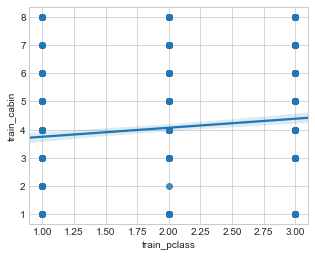

In [118]:
sb.regplot(x = "train_pclass", y = "train_cabin", data = df_train, scatter = True)

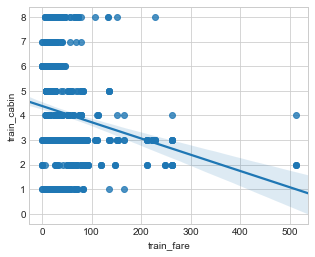

In [119]:
sb.regplot(x = "train_fare", y = "train_cabin", data = df_train, scatter = True)

Distribusi dari blok penumpang berubah

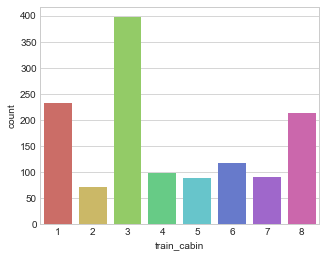

In [120]:
sb.countplot(x = "train_cabin", data = df_train, palette = 'hls')

#### Derandomisasi

Derandomisasi adalah sebuah proses untuk mengembalikan urutan data dan semua nilai dari blok kabin yang selesai diimputasi ke dataframe awal. Proses ini meliputi beberapa step yang memakan waktu (running time) yang tidak sebentar untuk mencari index sebelum diberikan sampling acak.

Salah satu step dari derandomisasi adalah searching dan update index dari data sebelum sampling acak, dan step searching dan update memakan waktu yang lama. Karena itu kami melakukan export dataframe ke csv untuk mempercepat proses apabila analisis harus dilakukan dari awal. Beberapa kode untuk searching dan update, juga untuk export terlihat dalam komentar (comment)

In [121]:
df_train.head()

,train_cabin,train_fare,train_pclass
0,2,211.3375,1
1,3,151.5500,1
2,3,151.5500,1
3,3,151.5500,1
4,3,151.5500,1


In [122]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C


In [123]:
# Make the original data categorical
df["cabin"] = np.where(df["cabin"] == "A", 1, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "B", 2, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "C", 3, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "D", 4, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "E", 5, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "F", 6, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "G", 7, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "T", 8, df["cabin"])
df["cabin"] = np.where(df["cabin"] == "nan", 0, df["cabin"])

In [124]:
len(df_proc1)
len(df_proc2)
len(df_proc3)

len(df_proc1) + len(df_proc2) + len(df_proc3) == len(original_df_test)

295

590

128

True

In [125]:
# Got this
original_df_test.head(6)

,test_cabin,test_fare,test_pclass
0,0,49.5042,1
1,0,78.8500,1
2,0,25.9250,1
3,0,227.5250,1
4,0,26.0000,1
5,0,262.3750,1


In [126]:
# From this
df_test.head()

,test_cabin,test_fare,test_pclass
random index,,,
0,0,7.2250,3
1,0,0.0000,3
2,0,9.5000,3
3,0,25.4667,3
4,0,6.9500,3


In [127]:
df_test["derandomize"] = random_sampling

In [128]:
df_test["to be index"] = np.zeros(len(df_test))

In [129]:
df_test.head(10)

,test_cabin,test_fare,test_pclass,derandomize,to be index
random index,,,,,
0,0,7.2250,3,766,0.0
1,0,0.0000,3,866,0.0
2,0,9.5000,3,324,0.0
3,0,25.4667,3,145,0.0
4,0,6.9500,3,216,0.0
5,0,8.6625,3,594,0.0
6,0,11.5000,2,54,0.0
7,0,7.7500,3,279,0.0
8,0,7.7500,3,111,0.0


In [130]:
df_test.head()
#df_test.loc[1000:1010, :]

,test_cabin,test_fare,test_pclass,derandomize,to be index
random index,,,,,
0,0,7.2250,3,766,0.0
1,0,0.0000,3,866,0.0
2,0,9.5000,3,324,0.0
3,0,25.4667,3,145,0.0
4,0,6.9500,3,216,0.0


Ini adalah proses searching dan update yang memakan runtime cukup lama

In [131]:
"""for i in range(len(df_test)):
    for j in range(len(df_test)):
        if i == df_test.loc[j, ["derandomize"]].values:
            df_test.loc[i, ["to be index"]] = j"""

'for i in range(len(df_test)):\n    for j in range(len(df_test)):\n        if i == df_test.loc[j, ["derandomize"]].values:\n            df_test.loc[i, ["to be index"]] = j'

In [132]:
temp = pd.DataFrame()
temp

""


In [133]:
# To filter cabin
temp = temp.append([df_proc1, df_proc2, df_proc3], ignore_index=True)

In [134]:
temp.head()

,test_cabin,test_fare,test_pclass
0,1,7.2250,3
1,1,0.0000,3
2,1,9.5000,3
3,7,25.4667,3
4,1,6.9500,3


In [135]:
df_test["cabin"] = temp["test_cabin"]

In [136]:
df_test.head()

,test_cabin,test_fare,test_pclass,derandomize,to be index,cabin
random index,,,,,,
0,0,7.2250,3,766,0.0,1
1,0,0.0000,3,866,0.0,1
2,0,9.5000,3,324,0.0,1
3,0,25.4667,3,145,0.0,7
4,0,6.9500,3,216,0.0,1


In [137]:
df_test.drop(columns = ["test_cabin"], inplace=True)

In [138]:
df_test.head()

,test_fare,test_pclass,derandomize,to be index,cabin
random index,,,,,
0,7.2250,3,766,0.0,1
1,0.0000,3,866,0.0,1
2,9.5000,3,324,0.0,1
3,25.4667,3,145,0.0,7
4,6.9500,3,216,0.0,1


In [139]:
df_test.sort_values("to be index", inplace=True)

In [140]:
df_test.set_index("to be index", inplace=True)

Load data dari data yang sebelumnya diexport dilakukan bila analisis harus direstart dari awal

In [141]:
df_test = pd.read_csv("index derandomized.csv")

In [142]:
len(df_test)

1013

In [143]:
# Unique variance on cabin feature
df_test["cabin"].unique()

array([4, 6, 1, 5, 3, 8, 7, 2], dtype=int64)

In [144]:
counter = 0
for i in range(len(df)):
    if df.loc[i, "cabin"] == 0:
        df.loc[i, "cabin"] = df_test.loc[counter, "cabin"] 
        counter += 1

Proses export dataframe sudah dilakukan saat pertama kali analisis dilakukan

In [145]:
#df_test.to_csv("index derandomized.csv", encoding='utf-8', index=False)

In [146]:
df_test.tail(10)

,test_fare,test_pclass,derandomize,cabin
1003,14.4542,3,707,4
1004,14.4542,3,141,4
1005,7.2250,3,166,8
1006,7.2250,3,482,7
1007,14.4583,3,267,4
1008,14.4542,3,450,4
1009,14.4542,3,814,4
1010,7.2250,3,206,7
1011,7.2250,3,600,2
1012,7.8750,3,1012,1


In [148]:
df["cabin"].unique()

array([2, 3, 5, 4, 1, 6, 8, 7], dtype=int64)

#### -- Age --

Berikut ini akan kembali dilakukan proses pemilihan fitur, pada kali ini pada fitur age. Fitur age akan diubah menjadi sebuah fitur kategorik yang memanfaatkan nilai dari fitur age itu sendiri dan juga memanfaatkan nama depan (kata kedua) dari penumpang 

In [149]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,3


In [150]:
name_list = df["name"]
len(name_list)
name_list[15]

1308

'Baumann, Mr. John D'

In [151]:
age_list = df.loc[:].age
len(age_list)
age_list[15]

1308

nan

In [152]:
sibsp_list = df.loc[:].sibsp

parch_list = df.loc[:].parch

Klasifikasi manual terhadap nama penumpang dilakukan

In [154]:
# Running manual clasifier
name_title_list = []

for item in name_list:
    f, *_ = item.split(".")
    ff, bb, *_ = f.split(" ")
    name_title_list.append(bb)

Pembuatan list kategori berupa Adult & Child dilakukan dengan beberapa pernyataan kondisional

In [156]:
age_category_list = list(np.random.randint(1, high=80, size=len(name_list)) )

for i in range(len(name_list)):
    category = ["Adult", "Child"]
    
    # Classifying age category from title
    if name_list[i] == "Master":
        age_category_list[i] = "Child"
    elif name_list[i] == "Mrs":
        age_category_list[i] = "Adult"
    elif name_list[i] == "Mr":
        age_category_list[i] = "Adult"
    elif name_list[i] == "Miss":
        if sibsp[i] > 0 and parch == 0:
            age_category_list[i] = "Adult"
        else:
            cat = random.sample(category, 1)
            age_category_list[i] = cat[0]
    else:
        cat = random.sample(category, 1)
        age_category_list[i] = cat[0]
        
    # Classifying age category from age
    if age_list[i] < 17:
        age_category_list[i] = "Child"
    elif age_list[i] >= 17:
        age_category_list[i] = "Adult"
    else:
        cat = random.sample(category, 1)
        age_category_list[i] = cat[0]

In [157]:
age_category_list[0:5]

['Adult', 'Child', 'Child', 'Adult', 'Adult']

In [158]:
df["age_category"] = age_category_list

Sampai saat ini setidaknya fitur-fitur yang kira-kira dibutuhkan untuk menjawab pertanyaan akhir telah didapatkan. Dan beberapa fitur lainnya yang menjadi pembantu mendapatkan fitur-fitur tersebut dapat dibuang

In [159]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,age_category
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,2,Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,3,Child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,3,Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,3,Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,3,Adult


Berikut ini fitur nama, sibling-spouse, parent-children, dan tiket dibuang

In [160]:
df.drop(columns=["name", "sibsp", "parch", "ticket"], inplace=True)

In [161]:
df.head()

,pclass,survived,sex,age,fare,cabin,age_category
0,1,1,female,29.0000,211.3375,2,Adult
1,1,1,male,0.9167,151.5500,3,Child
2,1,0,female,2.0000,151.5500,3,Child
3,1,0,male,30.0000,151.5500,3,Adult
4,1,0,female,25.0000,151.5500,3,Adult


#### -- Penggabungan Fitur --

Fitur akan digabungkan menjadi 1 (zipped) pada tahap ini. Dan selanjutnya akan dilakukan tahap penghitungan elbow dan KMeans clustering

In [162]:
df["age_category"] = np.where(df["age_category"] == "Child", 0, df["age_category"])
df["age_category"] = np.where(df["age_category"] == "Adult", 1, df["age_category"])

df["sex"] = np.where(df["sex"] == "female", 0, df["sex"])
df["sex"] = np.where(df["sex"] == "male", 1, df["sex"])

Beberapa fitur disisihkan lagi, yaitu pclass, fare, dan age. Fitur-fitur tersebut telah membantu untuk mendapatkan fitur-fitur inti yang sepertinya cukup kuat untuk dijadikan penjawab dari pertanyaan eksplorasi

In [163]:
df.drop(columns=["pclass", "fare", "age"], inplace=True)

In [173]:
df.head()

,survived,sex,cabin,age_category
0,1,0,2,1
1,1,1,3,0
2,0,0,3,0
3,0,1,3,1
4,0,0,3,1


### 4. Kalkulasi Metode Elbow dan KMeans Clustering

Metode elbow adalah sebuah metode untuk menentukan jumlah kluster optimal dari vektor input yang diberikan kepada KMeans. Berikut akan dilakukan penghitungan metode elbow dan didapatkan hasilnya untuk menjadi input bagi clustering KMeans

Import library KMeans dan penggabungan fitur dalam variabel df_feature

In [166]:
from sklearn.cluster import KMeans

In [174]:
df_feature = df.iloc[:, :].values

Metode Elbow dihitung dalam variabel WCSS

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Text(0.5,1,'Elbow Method')

Text(0.5,0,'Number of Clusters')

Text(0,0.5,'WCSS')

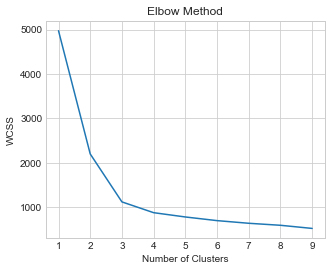

In [255]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(df_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Dari grafik di atas dapat dilihat bahwa semenjak 4 kluster, tidak terdapat banyak perubahan pada hasil WCSS. Artinya kluster dengan n berjumlah 4 adalah jumlah yang optimal untuk data yang akan kita klastering

#### KMeans Clustering

Di bawah ini data akan dimasukkan ke dalam model KMeans dengan cluster 4

In [237]:
fit_kmeans = KMeans(n_clusters = 4).fit(df_feature)

### 5. Visualisasi Klaster dan Analisis

Berikut akan disajikan visualisasi dari data dan analisis terhadap visualisasinya

Text(0.5,1,'Derajat Survival berdasarkan Gender')

Text(0.5,0,'survived')

Text(0,0.5,'sex')

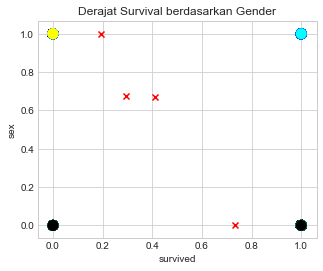

In [234]:
# Visualize Kmeans clusters with scatter
fig, ax = plt.subplots()

plt.title("Derajat Survival berdasarkan Gender. Pusat Survival Gender")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

colors = ["blue", "green", "cyan", "magenta", "yellow", "black"]

label = fit_kmeans.labels_

plt.scatter(df_feature[:,0], df_feature[:,1], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors), linewidths=5)
plt.scatter(fit_kmeans.cluster_centers_[:, 0], fit_kmeans.cluster_centers_[:,1], marker='x', c='r',  linewidths=5)

plt.show()

Nilai Survived := 0, meninggal; 1, hidup.

Nilai Gender := 0, perempuan; 1, laki-laki.

Titik Pusat Kluster := Survival dan Gender

Karena ketiga pusat klaster lebih dekat ke arah kiri atas, berarti korban jiwa lebih banyak dari kalangan laki-laki. Dan pusat klaster di titik bawah menandakan bahwa perempuan (gender = 0) memiliki tingkat survival yang lebih besar daripada laki-laki

Text(0.5,1,'Derajat Survival berdasarkan Gender. Pusat Survival-Age')

Text(0.5,0,'survived')

Text(0,0.5,'sex')

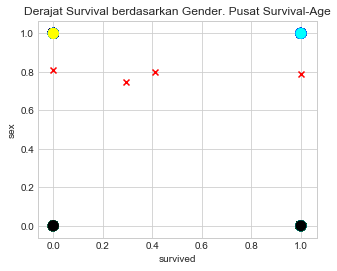

In [240]:
plt.title("Derajat Survival berdasarkan Gender. Pusat Survival-Age")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

plt.scatter(df_feature[:,0], df_feature[:,1], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors), linewidths=5)
plt.scatter(fit_kmeans.cluster_centers_[:, 0], fit_kmeans.cluster_centers_[:,3], marker='x', c='r', linewidths=5)

plt.show()

Nilai Survived := 0, meninggal; 1, hidup.

Nilai Gender := 0, perempuan; 1, laki-laki.

Titik Pusat Kluster := Survival dan Age

Karena ketiga pusat klaster lebih dekat ke arah atas menunjukkan bahwa mayoritas penumpang titanic adalah orang dewasa. Tingkat survival untuk orang dewasa bervariasi. 

Text(0.5,1,'Derajat Survival berdasarkan Gender. Pusat Gender-Age')

Text(0.5,0,'survived')

Text(0,0.5,'sex')

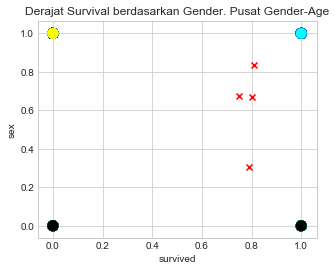

In [248]:
plt.title("Derajat Survival berdasarkan Gender. Pusat Age-Gender")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

plt.scatter(df_feature[:,0], df_feature[:,1], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors), linewidths=5)
plt.scatter(fit_kmeans.cluster_centers_[:, 3], fit_kmeans.cluster_centers_[:,1], marker='x', c='r', linewidths=5)

plt.show()

Perbandingan pusat klaster Age-Gender (x, y) menunjukkan bahwa harapan hidup terhadap orang dewasa besar seperti yang telah ditunjukkan sebelumnya. Dan tiga pusat klaster yang menuju ke kanan atas menunjukkan bahwa tingkat hidup lebih tinggi dimiliki laki-laki dewasa dibandingkan perempuan dewasa.

Text(0.5,1,'Derajat Survival berdasarkan Kabin. Pusat Survival-Kabin')

Text(0.5,0,'survived')

Text(0,0.5,'cabin')

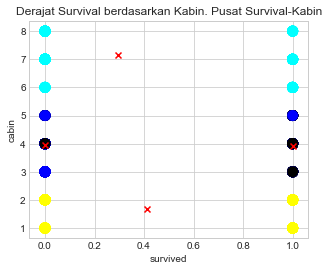

In [253]:
plt.title("Derajat Survival berdasarkan Kabin. Pusat Survival-Kabin")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[2])

plt.scatter(df_feature[:,0], df_feature[:,2], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors), linewidths=5)
plt.scatter(fit_kmeans.cluster_centers_[:, 0], fit_kmeans.cluster_centers_[:,2], marker='x', c='r', linewidths=5)

plt.show()

Nilai Survived := 0, meninggal; 1, hidup.

Nilai Kabin := 1 - 8 untuk { A, B, C, D, E, F, G, I, T }

Titik Pusat Kluster := Survival dan Kabin

Pusat klaster tersebar di atas, samping dan bawah. Secara berurut dari tertinggi, tingkat survival per-Kabin 3-4, 1-2, 6-7-8 dan 5. Kabin dengan tingkat survival tertinggi adalah kabin 3-4 dan tingkat survival paling rendah adalah kabin 5-3

Text(0.5,1,'Derajat Survival berdasarkan Kabin. Pusat Gender-Kabin')

Text(0.5,0,'survived')

Text(0,0.5,'cabin')

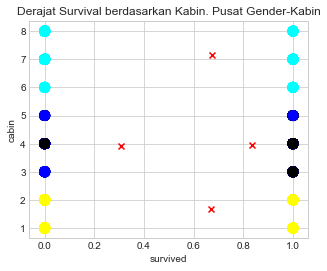

In [250]:
# Visualize Kmeans clusters with scatter
fig, ax = plt.subplots()

plt.title("Derajat Survival berdasarkan Kabin. Pusat Gender-Kabin")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[2])

plt.scatter(df_feature[:,0], df_feature[:,2], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors), linewidths=5, label=label)
plt.scatter(fit_kmeans.cluster_centers_[:, 1], fit_kmeans.cluster_centers_[:,2], marker='x', c='r')

plt.show()

Pusat Gender-Kabin (x, y). Sebelumnya telah diketahui bahwa kabin yang paling tinggi tingkat survivalnya adalah 3-4 dan yang paling buruk adalah 5. Dari persebaran pusat klaster dapat dilihat bahwa tingkat hidup bagi laki-laki terdapat pada kabin 3-4., lalu disusul dengan kabin 6-7-8 dan 1-2. Dengan kabin 5 berada di paling akhir

Text(0.5,1,'Derajat Survival berdasarkan Kabin. Pusat Umur, Kabin')

Text(0.5,0,'survived')

Text(0,0.5,'cabin')

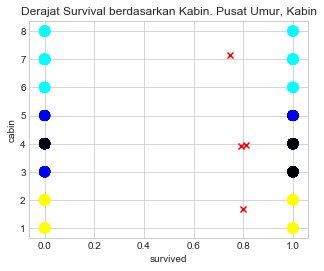

In [251]:
# Visualize Kmeans clusters with scatter
fig, ax = plt.subplots()

plt.title("Derajat Survival berdasarkan Kabin. Pusat Age- Kabin")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[2])

plt.scatter(df_feature[:,0], df_feature[:,2], marker='o', c = label, cmap=matplotlib.colors.ListedColormap(colors), linewidths=5, label=label)
plt.scatter(fit_kmeans.cluster_centers_[:, 3], fit_kmeans.cluster_centers_[:,2], marker='x', c='r')

plt.show()

Pusat Age-Kabin (x, y). Dapat dilihat secara merata pada setiap kabin, tingkat survival untuk orang dewasa lebih besar daripada anak kecil.

### 6. Kesimpulan

Pada eksplorasi data titanic dengan algoritma KMeans. Dapat diambil kesimpulan bahwa:
1. Tingkat survival bagi perempuan lebih besar dari laki-laki.
2. Laki-laki dewasa memiliki tingkat survival lebih besar daripada pasangan gender-umur lainnya.
3. Orang dewasa memiliki tingkat survival yang lebih besar dibanding anak kecil.
4. Kabin C-D memiliki tingkat survival paling baik dan kabin E adalah yang paling buruk.

Secara ringkas dapat dikatakan bahwa banyaknya korban di tragedi titanic karena
1. Tingkat survival laki-laki yang lebih kecil dari perempuan, namun jumlah laki-laki lebih banyak dari perempuan.
2. Tingkat survival paling baik bisa didapatkan di Kabin C-D, namun Kabin lainnya memiliki tingkat survival di bawah 0.5 dengan Kabin E menjadi yang terburuk.
3. Anak kecil memiliki tingkat survival yang jauh di bawah orang dewasa pada setiap gender dan kabin